In [1]:
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df_data = pd.read_csv('data.csv')
print(df_data.head(3))

                                  Flow ID        Src IP  Src Port  \
0  192.168.1.90-192.168.1.3-53930-64738-6  192.168.1.90   53930.0   
1  192.168.1.3-192.168.1.90-64738-37700-6   192.168.1.3   64738.0   
2     192.168.1.3-192.168.1.90-22-40854-6   192.168.1.3      22.0   

         Dst IP  Dst Port  Protocol               Timestamp  Flow Duration  \
0   192.168.1.3     64738       6.0  01/01/1970 07:41:46 AM     52601173.0   
1  192.168.1.90     37700       6.0  01/01/1970 07:41:46 AM    119106942.0   
2  192.168.1.90     40854       6.0  01/01/1970 07:41:46 AM         5589.0   

   Total Fwd Packet  Total Bwd packets  ...    Active Std  Active Max  \
0            1701.0             1793.0  ...  0.000000e+00         0.0   
1              36.0               57.0  ...  3.416174e+06  19996926.0   
2               1.0                1.0  ...  0.000000e+00         0.0   

   Active Min  Idle Mean     Idle Std   Idle Max   Idle Min   Label  \
0         0.0        0.0     0.000000        0

In [3]:
print(df_data.tail(5))

                                         Flow ID        Src IP  Src Port  \
8656762  192.168.1.70-192.168.1.90-37479-1234-17  192.168.1.70   37479.0   
8656763         136.162.16.0-255.255.255.1-0-0-0  136.162.16.0       0.0   
8656764  192.168.1.70-192.168.1.90-57042-1234-17  192.168.1.70   57042.0   
8656765  192.168.1.70-192.168.1.90-57890-1234-17  192.168.1.70   57890.0   
8656766  192.168.1.70-192.168.1.90-53417-1234-17  192.168.1.70   53417.0   

                Dst IP  Dst Port  Protocol               Timestamp  \
8656762   192.168.1.90      1234      17.0  02/01/1970 04:44:54 AM   
8656763  255.255.255.1         0       0.0  02/01/1970 04:45:08 AM   
8656764   192.168.1.90      1234      17.0  02/01/1970 04:45:18 AM   
8656765   192.168.1.90      1234      17.0  02/01/1970 04:46:10 AM   
8656766   192.168.1.90      1234      17.0  02/01/1970 04:46:19 AM   

         Flow Duration  Total Fwd Packet  Total Bwd packets  ...  Active Std  \
8656762     22485411.0            2307.0  

In [4]:
# Quick awareness of entries-columns of dataframe
df_data.info()
#checking for null and dropping
print('Number of missing values: \n',df_data.isna().sum())
print('Number of incomplete rows: \n',df_data.isna().sum().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656767 entries, 0 to 8656766
Data columns (total 86 columns):
 #   Column                      Dtype  
---  ------                      -----  
 0   Flow ID                     object 
 1   Src IP                      object 
 2   Src Port                    float64
 3   Dst IP                      object 
 4   Dst Port                    int64  
 5   Protocol                    float64
 6   Timestamp                   object 
 7   Flow Duration               float64
 8   Total Fwd Packet            float64
 9   Total Bwd packets           float64
 10  Total Length of Fwd Packet  float64
 11  Total Length of Bwd Packet  float64
 12  Fwd Packet Length Max       float64
 13  Fwd Packet Length Min       float64
 14  Fwd Packet Length Mean      float64
 15  Fwd Packet Length Std       float64
 16  Bwd Packet Length Max       float64
 17  Bwd Packet Length Min       float64
 18  Bwd Packet Length Mean      float64
 19  Bwd Packet Length Std

In [5]:
# Getting insight on Data
unique_labels = df_data['Label'].unique()
unique_traffic_types = df_data['Traffic Type'].unique()
unique_traffic_subtypes = df_data['Traffic Subtype'].unique()
unique_Src_ID = df_data['Src IP'].unique()
unique_Dst_IP=  df_data['Dst IP'].unique()
unique_protocols = df_data['Protocol'].unique()

print('Unique labels : \n',unique_labels)
print('Unique traffic types : \n',unique_traffic_types)
print ('Unique Traffic subtypes : \n ',unique_traffic_subtypes)
print ('Unique_Src_IP : \n ',unique_Src_ID )
print ('Unique_Dst_IP : \n ',unique_Dst_IP)
print ('Unique_protocols : \n ',unique_protocols)

Unique labels : 
 ['Benign' 'Malicious']
Unique traffic types : 
 ['Audio' 'Background' 'Bruteforce' 'DoS' 'Information Gathering' 'Mirai'
 'Text' 'Video']
Unique Traffic subtypes : 
  ['Audio' 'Background' 'Bruteforce FTP' 'Bruteforce SSH'
 'Bruteforce Telnet' 'Bruteforce HTTP' 'Bruteforce DNS' 'DoS ICMP'
 'DoS UDP' 'DoS SYN' 'DoS FIN' 'DoS ACK' 'DoS PSH' 'DoS RST' 'DoS URG'
 'DoS ECN' 'DoS CWR' 'DoS HTTP' 'DoS MAC' 'Information Gathering'
 'Mirai Scan Bruteforce' 'Mirai DDoS UDP' 'Mirai DDoS ACK'
 'Mirai DDoS SYN' 'Mirai DDoS GREIP' 'Mirai DDoS GREETH' 'Mirai DDoS HTTP'
 'Mirai DDoS DNS' 'Text' 'Video HTTP' 'Video RTP' 'Video UDP']
Unique_Src_IP : 
  ['192.168.1.90' '192.168.1.3' '192.168.1.70' '136.162.16.0'
 '192.168.1.220' '192.168.1.177' '192.168.1.42' '192.168.1.244'
 '192.168.1.59' '134.221.96.0' '8.6.0.1' '136.142.2.3' '136.142.1.3']
Unique_Dst_IP : 
  ['192.168.1.3' '192.168.1.90' '255.255.255.1' '192.168.1.70'
 '192.168.1.244' '192.168.1.42' '192.168.1.220' '192.168.1.177'
 

In [6]:
malicious_records = df_data[df_data['Label']=='Malicious']
bening_records = df_data[df_data['Label']=='Benign']
malicious_source_count = malicious_records[['Src IP']].value_counts() #malicious ip sources number of appearances  (index is  each unique sample of the label and the other column is the number of appearances)
malicious_dest_count =  malicious_records[['Dst IP']].value_counts() #malicious ip destinations  number of appearances 
bening_source_count = bening_records[['Src IP']].value_counts() # bening  ip sources number of appearances 
malicious_traffic_types_count = malicious_records[['Traffic Type']].value_counts()
malicious_traffic_subtypes_count = malicious_records[['Traffic Subtype']].value_counts()
bening_traffic_types_count = bening_records[['Traffic Type']].value_counts()
bening_traffic_subtypes_count = bening_records[['Traffic Subtype']].value_counts()

print('Malicious records from Src IP: \n',malicious_source_count)
print('Bening records from Src IP : \n',bening_source_count) 
print('malicious  Ip Dst:\n',malicious_dest_count) 
print('malicious_traffic_types_count: \n',malicious_traffic_types_count) #types of malicious attacks
print('malicious_traffic_subtypes_count: \n',malicious_traffic_subtypes_count) #subtypes of malicious attacks
print('bening_traffic_types_count: \n',bening_traffic_types_count) #types of  bening packets
print('bening_traffic_subtypes_count: \n',bening_traffic_subtypes_count ) #subtypes of bening packets


Malicious records from Src IP: 
 Src IP       
192.168.1.70     8540495
192.168.1.177      42228
192.168.1.244      38234
192.168.1.90       23969
192.168.1.59       10361
192.168.1.220        101
192.168.1.42          71
8.6.0.1                4
134.221.96.0           1
136.142.1.3            1
136.142.2.3            1
dtype: int64
Bening records from Src IP : 
 Src IP      
192.168.1.90    600
192.168.1.70    456
136.162.16.0    179
192.168.1.3      66
dtype: int64
malicious  Ip Dst:
 Dst IP         
192.168.1.90       8540495
192.168.1.42         52806
192.168.1.59         25053
192.168.1.70         23969
192.168.1.177         5224
192.168.1.244         5201
192.168.1.220         2699
224.0.0.251              6
239.255.255.250          6
8.0.6.4                  4
0.0.0.32                 1
0.135.254.3              1
0.95.254.3               1
dtype: int64
malicious_traffic_types_count: 
 Traffic Type         
DoS                      7490929
Information Gathering    1038363
Mirai  

In [7]:
print('insight for the  flow_id: \n',df_data['Flow ID'].head(5))
print('insight for the  timestamp:\n',df_data['Timestamp'].head(5))
print('insight for the flow duration: \n',df_data['Flow Duration'].head(5))
print('this is Total Fwd Packet: \n',df_data['Total Fwd Packet'].head(5))
print('this is Total Bwd packets:  \n',df_data['Total Bwd packets'].head(5))
print('Total Length of Bwd Packet: \n',df_data['Total Length of Bwd Packet'].head(5))
print('Total Length of Fwd Packet:\n',df_data[ 'Total Length of Fwd Packet'].head(5))
print(' Fwd Packet Length Max \n:',df_data['Fwd Packet Length Max'].head(5))
print(' Fwd Packet Length Min   \n:',df_data[ 'Fwd Packet Length Min'].head(5))
print(' Bwd Packet Length Max  \n:',df_data[ 'Bwd Packet Length Max'].head(5))
print(' Bwd Packet Length Min  \n:',df_data[ 'Bwd Packet Length Min'].head(5))

insight for the  flow_id: 
 0     192.168.1.90-192.168.1.3-53930-64738-6
1     192.168.1.3-192.168.1.90-64738-37700-6
2        192.168.1.3-192.168.1.90-22-40854-6
3     192.168.1.70-192.168.1.3-55422-64738-6
4    192.168.1.90-192.168.1.3-59658-64738-17
Name: Flow ID, dtype: object
insight for the  timestamp:
 0    01/01/1970 07:41:46 AM
1    01/01/1970 07:41:46 AM
2    01/01/1970 07:41:46 AM
3    01/01/1970 07:41:47 AM
4    01/01/1970 07:41:50 AM
Name: Timestamp, dtype: object
insight for the flow duration: 
 0     52601173.0
1    119106942.0
2         5589.0
3    118166562.0
4    119988385.0
Name: Flow Duration, dtype: float64
this is Total Fwd Packet: 
 0    1701.0
1      36.0
2       1.0
3    3932.0
4      25.0
Name: Total Fwd Packet, dtype: float64
this is Total Bwd packets:  
 0    1793.0
1      57.0
2       1.0
3    4196.0
4    6795.0
Name: Total Bwd packets, dtype: float64
Total Length of Bwd Packet: 
 0    140566.0
1      1650.0
2         0.0
3    301478.0
4    534811.0
Name: T

In [8]:
print('Active Mean : \n:',df_data['Active Mean'].head(5))     
print('Active Std : \n:',df_data['Active Std'].head(5))   
print('Active Max : \n:',df_data['Active Max'].head(5))   
print('Active Min : \n:',df_data['Active Min'].head(5))   
print('Idle Mean : \n:',df_data['Idle Mean'].head(5))   
print('Idle Std : \n:',df_data['Idle Std'].head(5))           
print('Idle Max : \n:',df_data['Idle Max'].head(5))   
print('Idle Min : \n:',df_data['Idle Min'].head(5))   
print('Active Mean nunique : \n:',df_data['Active Mean'].nunique())
print('Active Std nunique : \n:',df_data['Active Std'].nunique())
print('Active Max nunique : \n:',df_data['Active Max'].nunique())
print('Active Min  nunique : \n:',df_data['Active Min'].nunique())
print('Idle Mean nunique : : \n:',df_data['Idle Mean'].nunique())   
print('Idle Std nunique : : \n:',df_data['Idle Std'].nunique())  
print('Idle Max  nunique : : \n:',df_data['Idle Max'].nunique())  
print('Idle Min nunique : : \n:',df_data['Idle Min'].nunique())  

Active Mean : 
: 0    0.000000e+00
1    1.802327e+07
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
Name: Active Mean, dtype: float64
Active Std : 
: 0    0.000000e+00
1    3.416174e+06
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
Name: Active Std, dtype: float64
Active Max : 
: 0           0.0
1    19996926.0
2           0.0
3           0.0
4           0.0
Name: Active Max, dtype: float64
Active Min : 
: 0           0.0
1    14078617.0
2           0.0
3           0.0
4           0.0
Name: Active Min, dtype: float64
Idle Mean : 
: 0          0.0
1    5001511.0
2          0.0
3          0.0
4          0.0
Name: Idle Mean, dtype: float64
Idle Std : 
: 0       0.000000
1    1737.400069
2       0.000000
3       0.000000
4       0.000000
Name: Idle Std, dtype: float64
Idle Max : 
: 0          0.0
1    5003516.0
2          0.0
3          0.0
4          0.0
Name: Idle Max, dtype: float64
Idle Min : 
: 0          0.0
1    5000449.0
2          0.0
3          0.0
4          0.0
N

In [9]:
print('Flow IAT Mean   : \n:',df_data['Flow IAT Mean'].head(5))     
print('Flow IAT Std  : \n:',df_data['Flow IAT Std'].head(5))   
print('Flow IAT Max : \n:',df_data['Flow IAT Max'].head(5))   
print('Flow IAT Min: \n:',df_data['Flow IAT Min'].head(5))   

#print('Active Mean nunique : \n:',df_data['Active Mean'].nunique())
#Flow Bytes/s    
#Flow Packets/s                      
'''
Fwd IAT Total               float64
Fwd IAT Mean                float64
Fwd IAT Std                 float64
Fwd IAT Max                 float64
Fwd IAT Min                 float64
Bwd IAT Total               float64
Bwd IAT Mean                float64
Bwd IAT Std                 float64
Bwd IAT Max                 float64
Bwd IAT Min                 float64
'''

Flow IAT Mean   : 
: 0    1.505902e+04
1    1.294641e+06
2    5.589000e+03
3    1.454000e+04
4    1.759618e+04
Name: Flow IAT Mean, dtype: float64
Flow IAT Std  : 
: 0    9.762175e+04
1    2.083523e+06
2    0.000000e+00
3    8.424333e+04
4    1.056254e+05
Name: Flow IAT Std, dtype: float64
Flow IAT Max : 
: 0    3252689.0
1    5003516.0
2       5589.0
3    3663220.0
4    4685144.0
Name: Flow IAT Max, dtype: float64
Flow IAT Min: 
: 0     -73.0
1      96.0
2    5589.0
3    -497.0
4      98.0
Name: Flow IAT Min, dtype: float64


'\nFwd IAT Total               float64\nFwd IAT Mean                float64\nFwd IAT Std                 float64\nFwd IAT Max                 float64\nFwd IAT Min                 float64\nBwd IAT Total               float64\nBwd IAT Mean                float64\nBwd IAT Std                 float64\nBwd IAT Max                 float64\nBwd IAT Min                 float64\n'

In [10]:
#Fwd packets  statistics
Fwd_packet_stats = df_data[['Total Fwd Packet','Total Length of Fwd Packet','Fwd Packet Length Max','Fwd Packet Length Min','Fwd Packet Length Mean',]].describe().T

#Bwd packet statistics
Bwd_packet_stats = df_data[['Total Bwd packets','Total Length of Bwd Packet','Bwd Packet Length Max','Bwd Packet Length Min','Bwd Packet Length Mean']].describe().T

# Packet Length Min            Packet Length Max           Packet Length Std          Packet Length Variance      Packet Length Mean 
print(Fwd_packet_stats)
print(Bwd_packet_stats)


                                count        mean           std  min   25%  \
Total Fwd Packet            8656767.0    3.845476    537.449064  1.0   1.0   
Total Length of Fwd Packet  8656767.0  818.233000  43500.673057  0.0  50.0   
Fwd Packet Length Max       8656767.0  305.729419    371.233190  0.0  50.0   
Fwd Packet Length Min       8656767.0  291.499298    364.027235  0.0  50.0   
Fwd Packet Length Mean      8656767.0  297.422395    363.965228  0.0  50.0   

                              50%     75%         max  
Total Fwd Packet              2.0     2.0    363356.0  
Total Length of Fwd Packet  130.0  1000.0  27879460.0  
Fwd Packet Length Max        50.0   500.0      1368.0  
Fwd Packet Length Min        50.0   500.0      1368.0  
Fwd Packet Length Mean       50.0   500.0      1368.0  
                                count        mean           std  min  25%  \
Total Bwd packets           8656767.0    0.950712    101.285068  0.0  0.0   
Total Length of Bwd Packet  8656767.0  14

In [11]:

df_data['Timestamp'] =pd.to_datetime(df_data['Timestamp'],errors='coerce') #errors?

drop_columns = ['Flow ID','Src Port','Dst Port','Traffic Subtype','Flow Duration','Timestamp','Protocol',
                            'Bwd PSH Flags','Bwd URG Flags','Fwd Bytes/Bulk Avg','Fwd Packet/Bulk Avg','Fwd Bulk Rate Avg',
                             'FIN Flag Count','SYN Flag Count','RST Flag Count','URG Flag Count','CWR Flag Count','ECE Flag Count',
                               'Bwd Bulk Rate Avg','Flow Bytes/s','Fwd Packets/s']

new_df = df_data.drop(columns=drop_columns) #,'','','',
  #'Idle Min','Idle Max','Idle Std','Idle Mean','Active Mean','Active Min', 'Active Max' ,'Active Std'

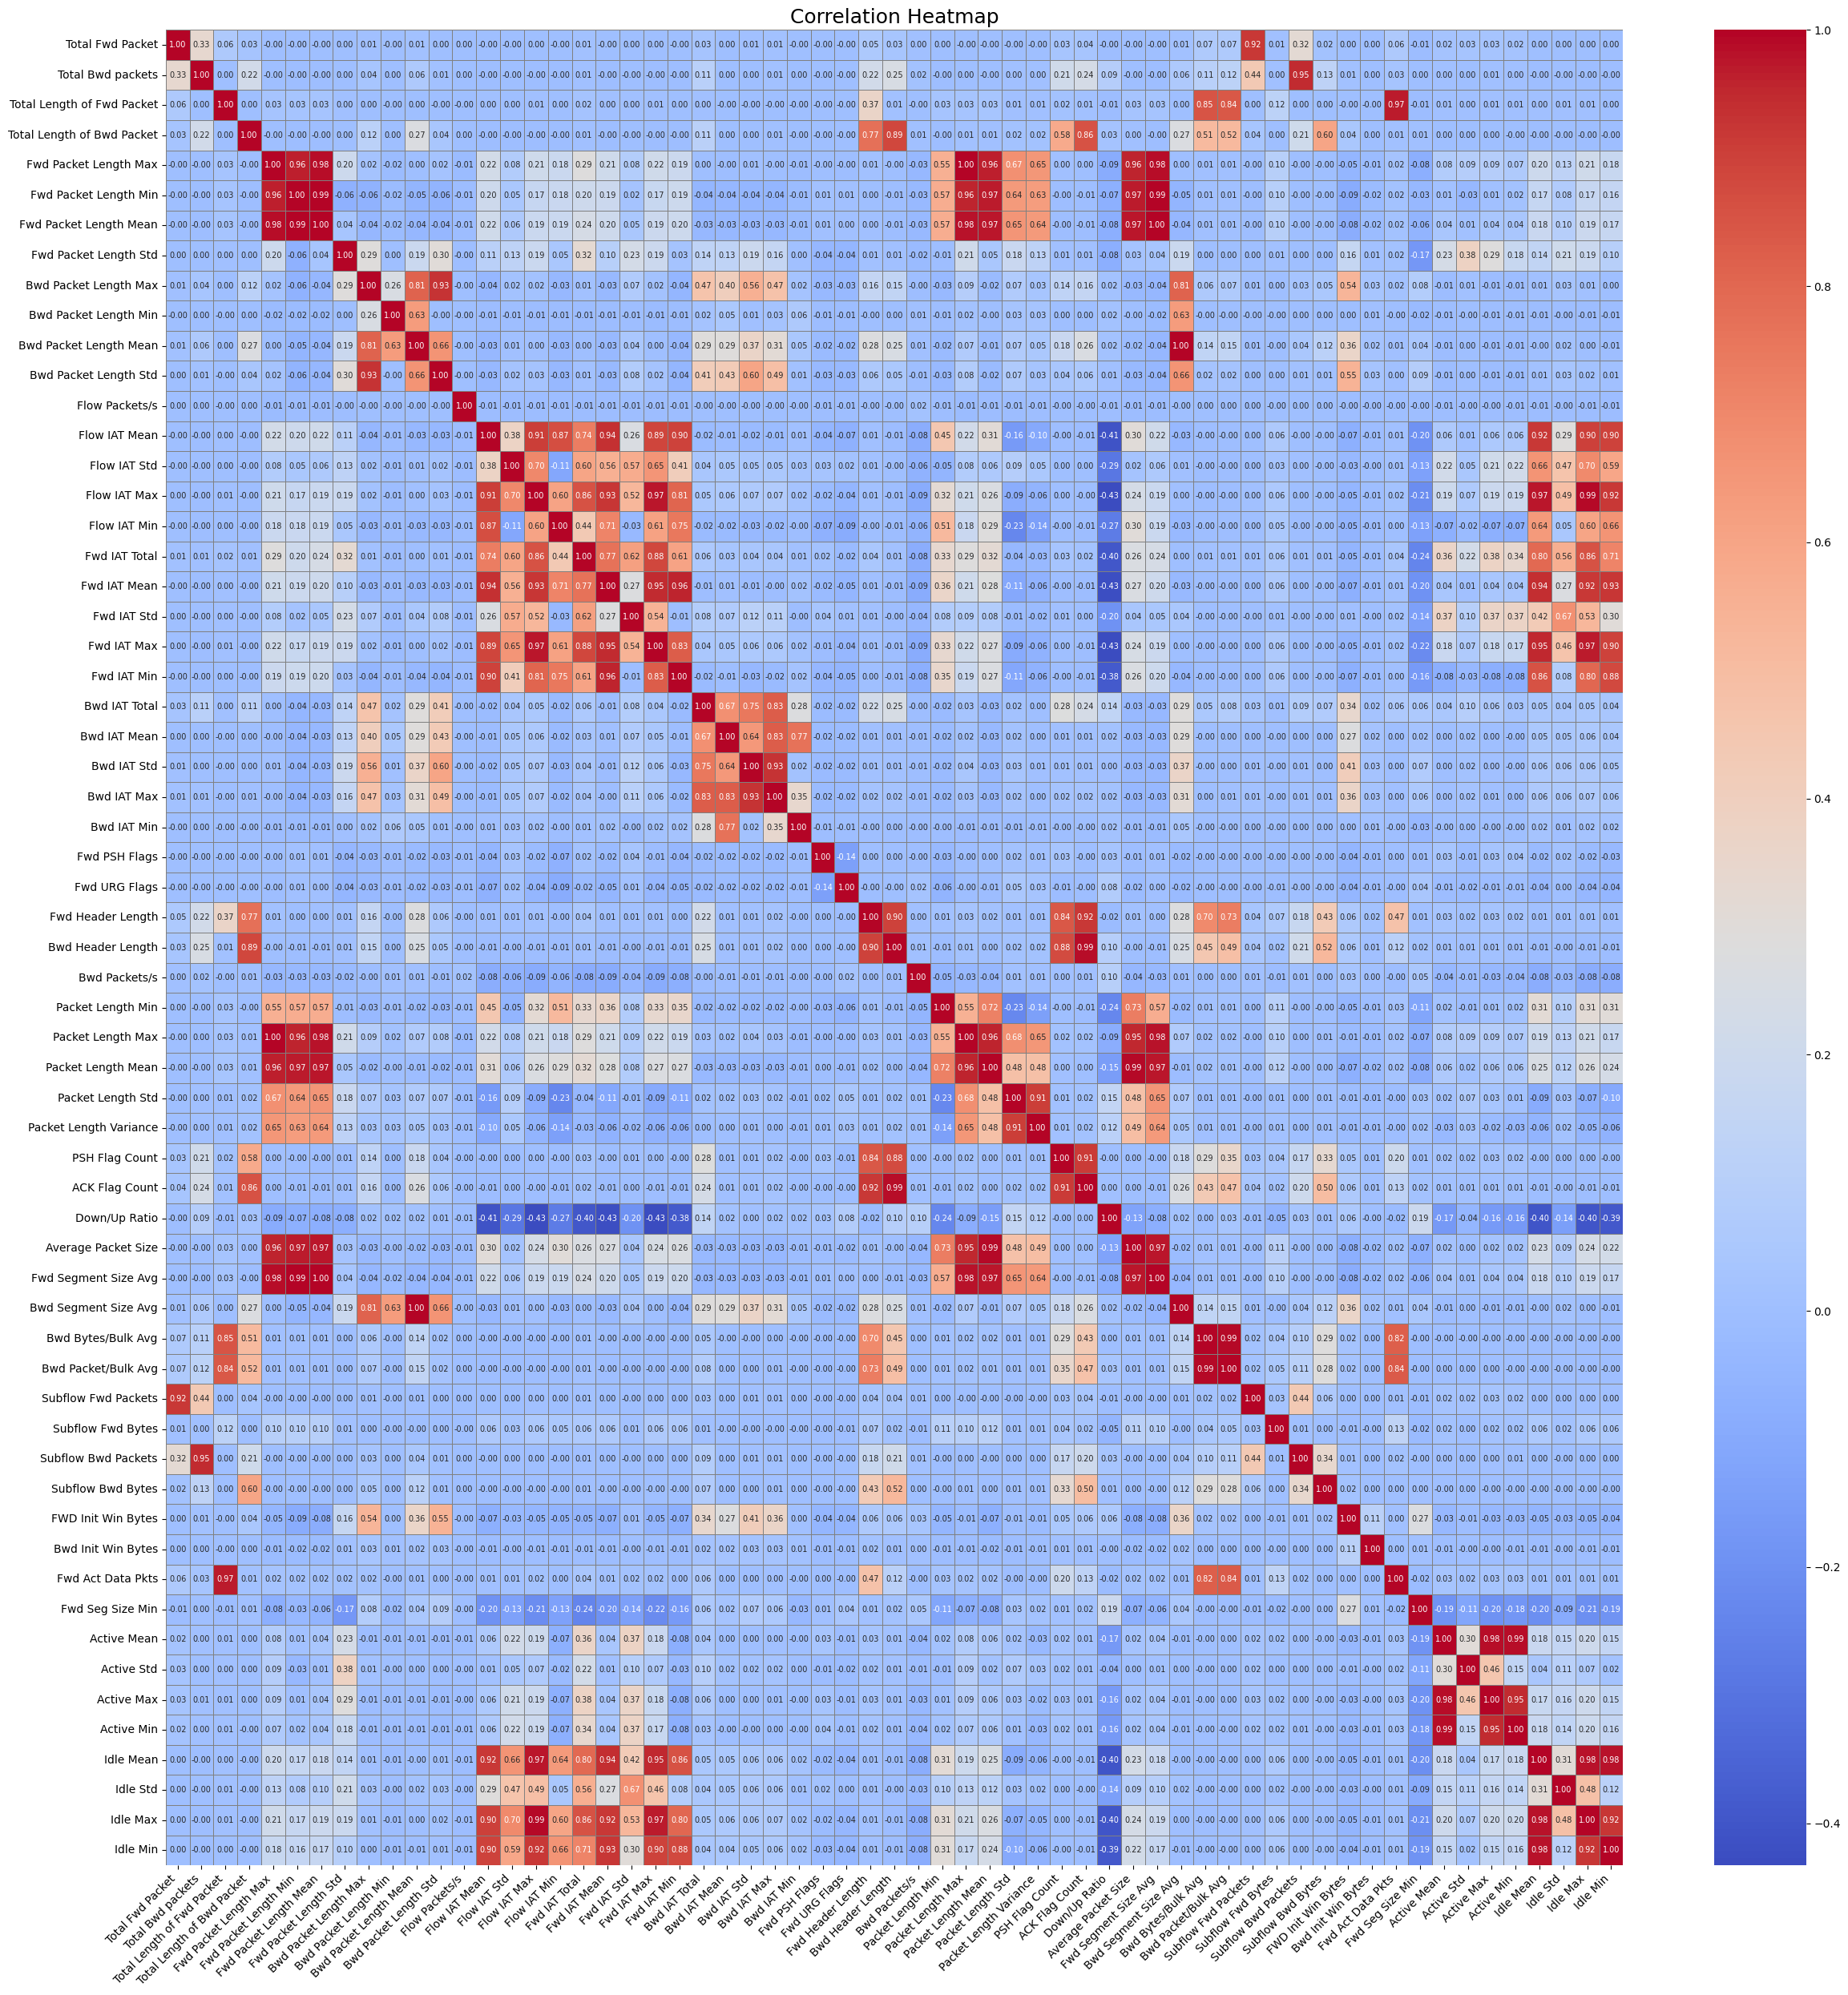

In [12]:
plt.figure(figsize=(25, 25)) 
correlation_matrix = new_df.corr(numeric_only=True)
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt=".2f", 
    cmap='coolwarm', 
    annot_kws={"size": 7},   # Reduce font size
    linewidths=0.5,
    linecolor='gray'
)
# Rotate labels and format layout
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels
plt.yticks(rotation=0)
plt.title("Correlation Heatmap", fontsize=18)
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

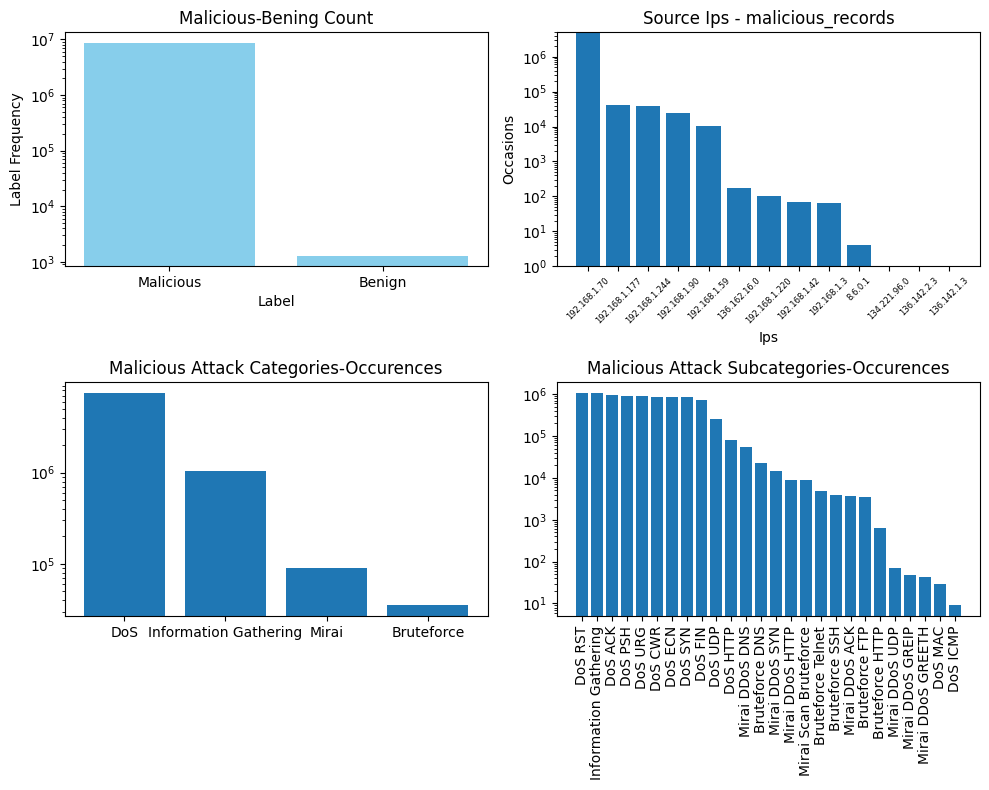

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
label_counts = df_data['Label'].value_counts()
ip_adresses =  df_data['Src IP'].value_counts()


malicious_source_count = malicious_records['Src IP'].value_counts() #malicious ip sources number of appearances  (index is  each unique sample of the label and the other column is the number of appearances)

axs[0, 0].set_title('Malicious-Bening Count')
axs[0, 0].bar(label_counts.index, label_counts.values, color='skyblue')
axs[0, 0].set_xlabel('Label')
axs[0, 0].set_ylabel('Label Frequency')
axs[0, 0].set_yscale('log')

axs[0, 1].set_title("Source Ips - malicious_records")
axs[0, 1].bar(height = ip_adresses.values, x = ip_adresses.index)
axs[0, 1].tick_params(axis='x', rotation=90)
axs[0, 1].set_xlabel('Ips')
axs[0, 1].set_ylabel('Occasions')
axs[0, 1].set_yscale('log')
axs[0, 1].set_xticks(ticks = np.arange(0,len(ip_adresses),1),labels = ip_adresses.index,rotation = 45, fontsize=6)  # Rotate labels and decrease font
axs[0, 1].set_ylim(1,5000000) 

malicious_traffic_types_count = malicious_records['Traffic Type'].value_counts()
axs[1, 0].set_title("Malicious Attack Categories-Occurences")
axs[1, 0].bar(malicious_traffic_types_count.index,malicious_traffic_types_count.values,log=True)
malicious_traffic_subtypes_count = malicious_records['Traffic Subtype'].value_counts()
axs[1, 1].set_title("Malicious Attack Subcategories-Occurences")
axs[1, 1].bar(malicious_traffic_subtypes_count.index,malicious_traffic_subtypes_count.values,log=True)
#axs[1, 1].set_ylabel('subcategories')
axs[1, 1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show() 

Total Fwd Packet                  3.845476
Total Bwd packets                 0.950712
Total Length of Fwd Packet      818.233000
Total Length of Bwd Packet      142.697038
Fwd Packet Length Max           305.729419
Fwd Packet Length Min           291.499298
Fwd Packet Length Mean          297.422395
Bwd Packet Length Max             4.076596
Bwd Packet Length Min             0.343846
Bwd Packet Length Mean            1.381145
Bwd Packet Length Std             1.817069
Average Packet Size             343.545350
Fwd Segment Size Avg            297.422395
Bwd Segment Size Avg              1.381145
Packet Length Min               106.846333
Packet Length Max               307.448580
Packet Length Mean              244.149385
Packet Length Std               104.639716
Packet Length Variance        39202.674738
dtype: float64


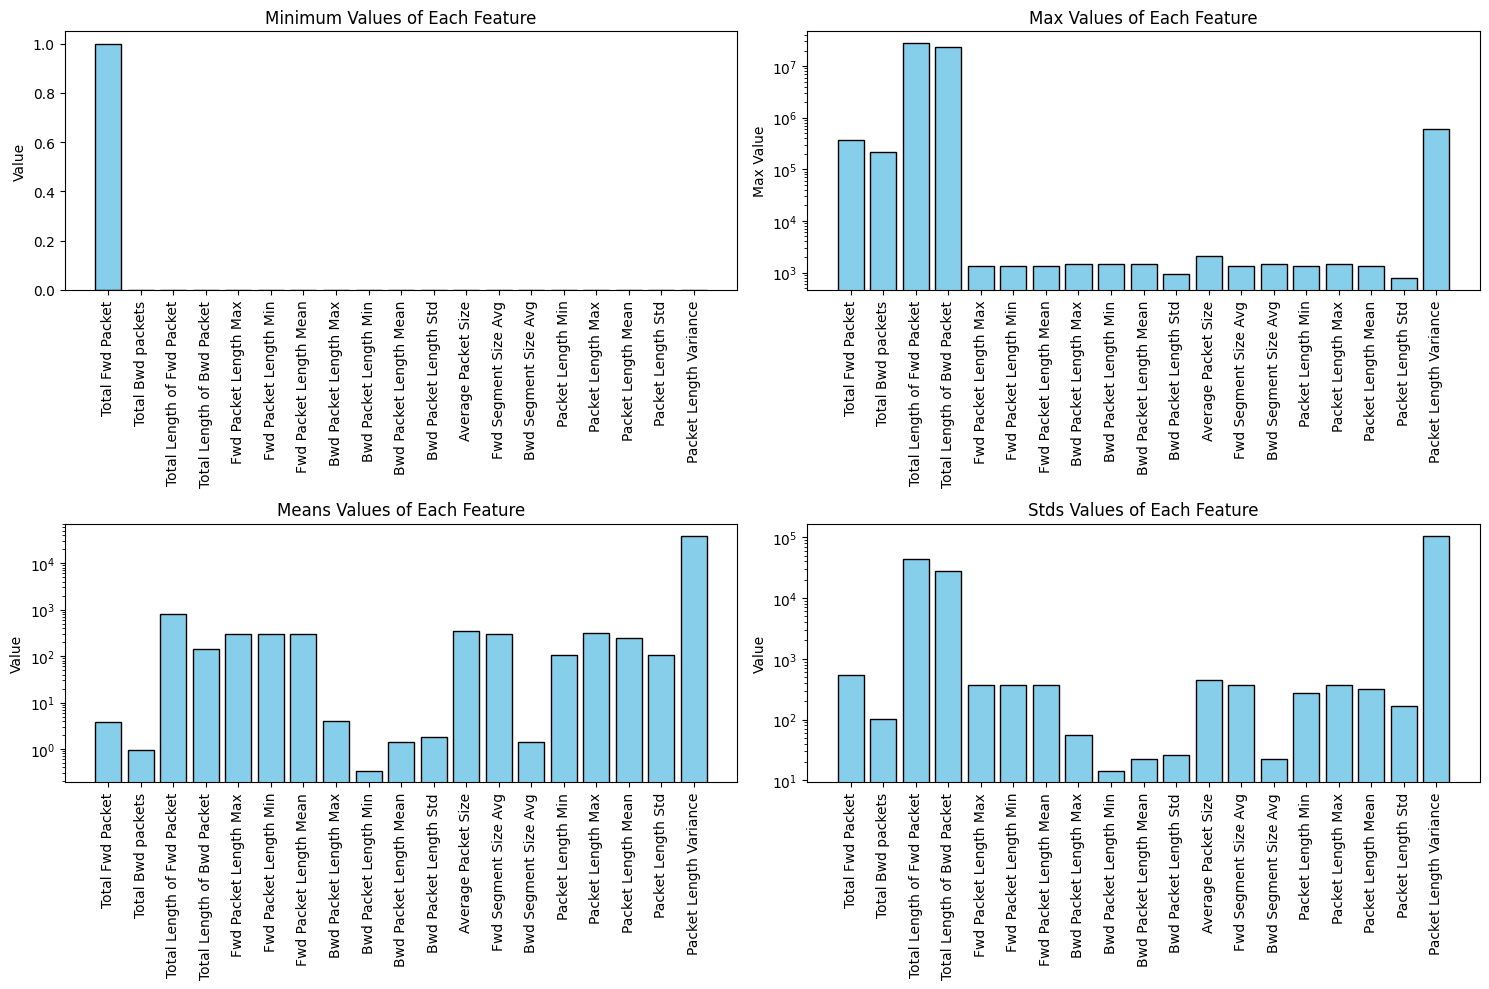

In [15]:
# List of your selected columns
cols_of_interest = [
    'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
    'Bwd Packet Length Std', 'Average Packet Size', 'Fwd Segment Size Avg',
    'Bwd Segment Size Avg', 'Packet Length Min', 'Packet Length Max',
    'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance'
]
# Filter the dataframe for only these columns
selected_df = df_data[cols_of_interest]

mins = df_data[cols_of_interest].min()
#print(mins)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
#plot plot(data=df_data[cols_of_interest].min(),labels=df_data[cols_of_interest].columns, kind='bar', color='skyblue', edgecolor='black')
axs[0, 0].bar(mins.index, mins.values, color='skyblue', edgecolor='black')
axs[0, 0].set_title("Minimum Values of Each Feature")
axs[0, 0].set_ylabel("Value")
#axs[0,0].yscale('log')
axs[0, 0].tick_params(axis='x', rotation=90)
maxes = df_data[cols_of_interest].max()
#print(maxes)

axs[0, 1].bar(maxes.index, maxes.values, color='skyblue', edgecolor='black')

axs[0, 1].set_title("Max Values of Each Feature")
axs[0, 1].set_ylabel("Max Value")
axs[0, 1].set_yscale('log')
axs[0, 1].tick_params(axis='x', rotation=90)

means = df_data[cols_of_interest].mean()
print(means)

axs[1, 0].bar(means.index, means.values, color='skyblue', edgecolor='black')
axs[1, 0].set_title("Means Values of Each Feature")
axs[1, 0].set_ylabel("Value")
axs[1, 0].set_yscale('log')
axs[1, 0].tick_params(axis='x', rotation=90)

stds = df_data[cols_of_interest].std()
axs[1, 1].bar(stds.index, stds.values, color='skyblue', edgecolor='black')
axs[1, 1].set_title("Stds Values of Each Feature")
axs[1, 1].set_ylabel("Value")
axs[1, 1].set_yscale('log')
axs[1, 1].tick_params(axis='x', rotation=90)
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Attacks')

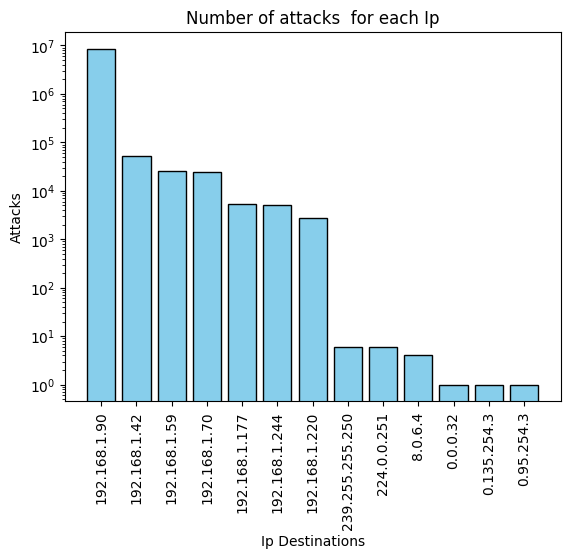

In [16]:
malicious_dest_count =  malicious_records['Dst IP'].value_counts() #malicious ip destinations  number of appearances 
plt.bar(x = malicious_dest_count.index,height = malicious_dest_count.values,color='skyblue', edgecolor='black')
plt.xticks(rotation = 90)
plt.yscale('log')
plt.xlabel('Ip Destinations')
plt.title('Number of attacks  for each Ip')
plt.ylabel('Attacks')

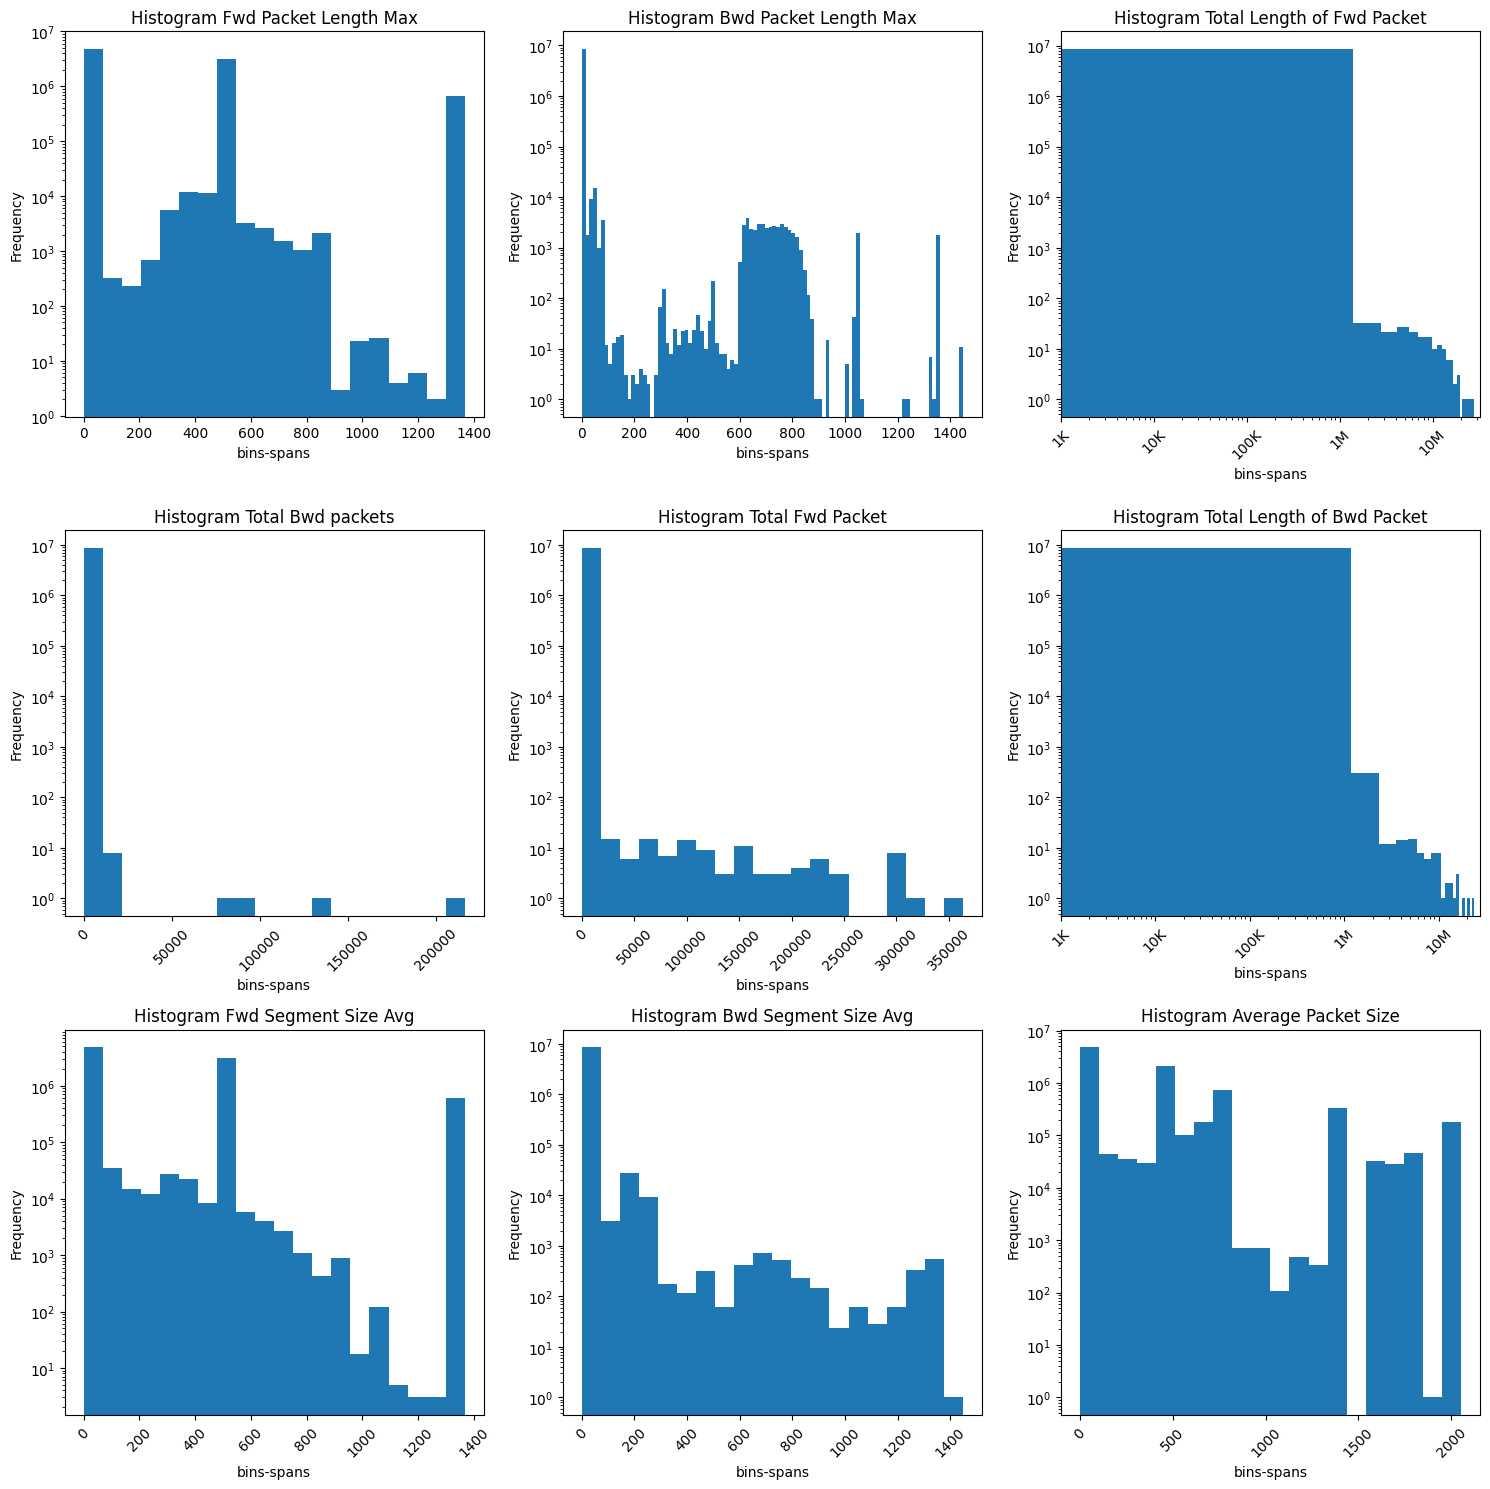

In [17]:
fig, axs = plt.subplots(3, 3 ,figsize=(15, 15))
# List of your selected columns
cols_of_interest = [
    'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
    'Bwd Packet Length Std', 'Average Packet Size', 'Fwd Segment Size Avg',
    'Bwd Segment Size Avg', 'Packet Length Min', 'Packet Length Max',
    'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance'
]
# Filter the dataframe for only these columns
#selected_df = df_data[cols_of_interest]
axs[0, 0].hist(df_data[ 'Fwd Packet Length Max'],bins=20)
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Histogram Fwd Packet Length Max')
axs[0, 0].set_xlabel('bins-spans')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df_data[ 'Bwd Packet Length Max'],bins=100)
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Histogram Bwd Packet Length Max')
axs[0, 1].set_xlabel('bins-spans')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df_data['Total Length of Fwd Packet'],bins=20)
axs[0, 2].set_yscale('log')
axs[0, 2].set_xscale('log')
axs[0, 2].set_title('Histogram Total Length of Fwd Packet')
axs[0, 2].set_xlabel('bins-spans')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].tick_params(axis='x', rotation=45) 
axs[0, 2].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7 ], labels=['1K', '10K', '100K', '1M', '10M'])
#axs[0, 2].set_xticks([1e2,1e3, 1e4, 1e5, 1e6, 1e7,2e7], labels=['100','1K', '10K', '100K', '1M', '10M','20M'])

axs[1, 0].hist(df_data['Total Bwd packets'],bins=20)
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Histogram Total Bwd packets')
axs[1, 0].set_xlabel('bins-spans')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].hist(df_data['Total Fwd Packet'],bins=20)
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Histogram Total Fwd Packet')
axs[1, 1].set_xlabel('bins-spans')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=45)                


axs[1, 2].hist(df_data['Total Length of Bwd Packet'],bins=20)
axs[1, 2].set_yscale('log')
axs[1, 2].set_xscale('log')
axs[1, 2].set_title('Histogram Total Length of Bwd Packet')
axs[1, 2].set_xlabel('bins-spans')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].tick_params(axis='x', rotation=45) 

axs[1, 2].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7 ], labels=['1K', '10K', '100K', '1M', '10M'])
#axs[1, 2].set_xticks([1, 10, 100, 1000, 10000,100000,1000000])
#axs[1, 2].get_xaxis().set_major_formatter(plt.ScalarFormatter())  # Show full numbers


#
axs[2, 0].hist(df_data['Fwd Segment Size Avg'],bins=20)
axs[2, 0].set_yscale('log')
axs[2, 0].set_title('Histogram Fwd Segment Size Avg')
axs[2, 0].set_xlabel('bins-spans')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].tick_params(axis='x', rotation=45) 

axs[2, 1].hist(df_data['Bwd Segment Size Avg'],bins=20)
axs[2, 1].set_yscale('log')
axs[2, 1].set_title('Histogram Bwd Segment Size Avg')
axs[2, 1].set_xlabel('bins-spans')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', rotation=45) 

axs[2, 2].hist(df_data['Average Packet Size'],bins=20)
axs[2, 2].set_yscale('log')
axs[2, 2].set_title('Histogram Average Packet Size')
axs[2, 2].set_xlabel('bins-spans')
axs[2, 2].set_ylabel('Frequency')
axs[2, 2].tick_params(axis='x', rotation=45) 
plt.tight_layout()



<function matplotlib.pyplot.show(close=None, block=None)>

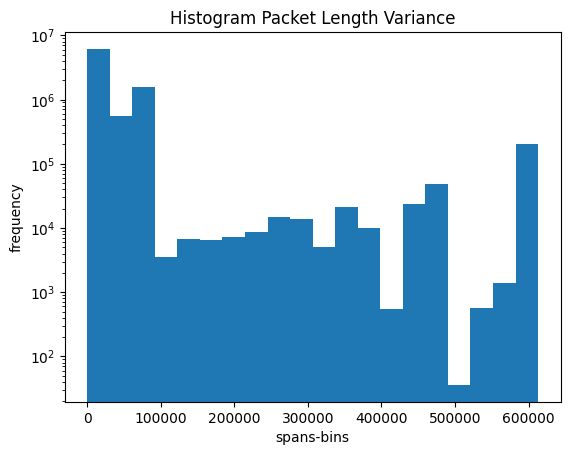

In [18]:
plt.hist(df_data['Packet Length Variance'],bins=20)
plt.xlabel('spans-bins')
plt.yscale('log')
plt.ylabel('frequency')
plt.title('Histogram Packet Length Variance')
plt.show

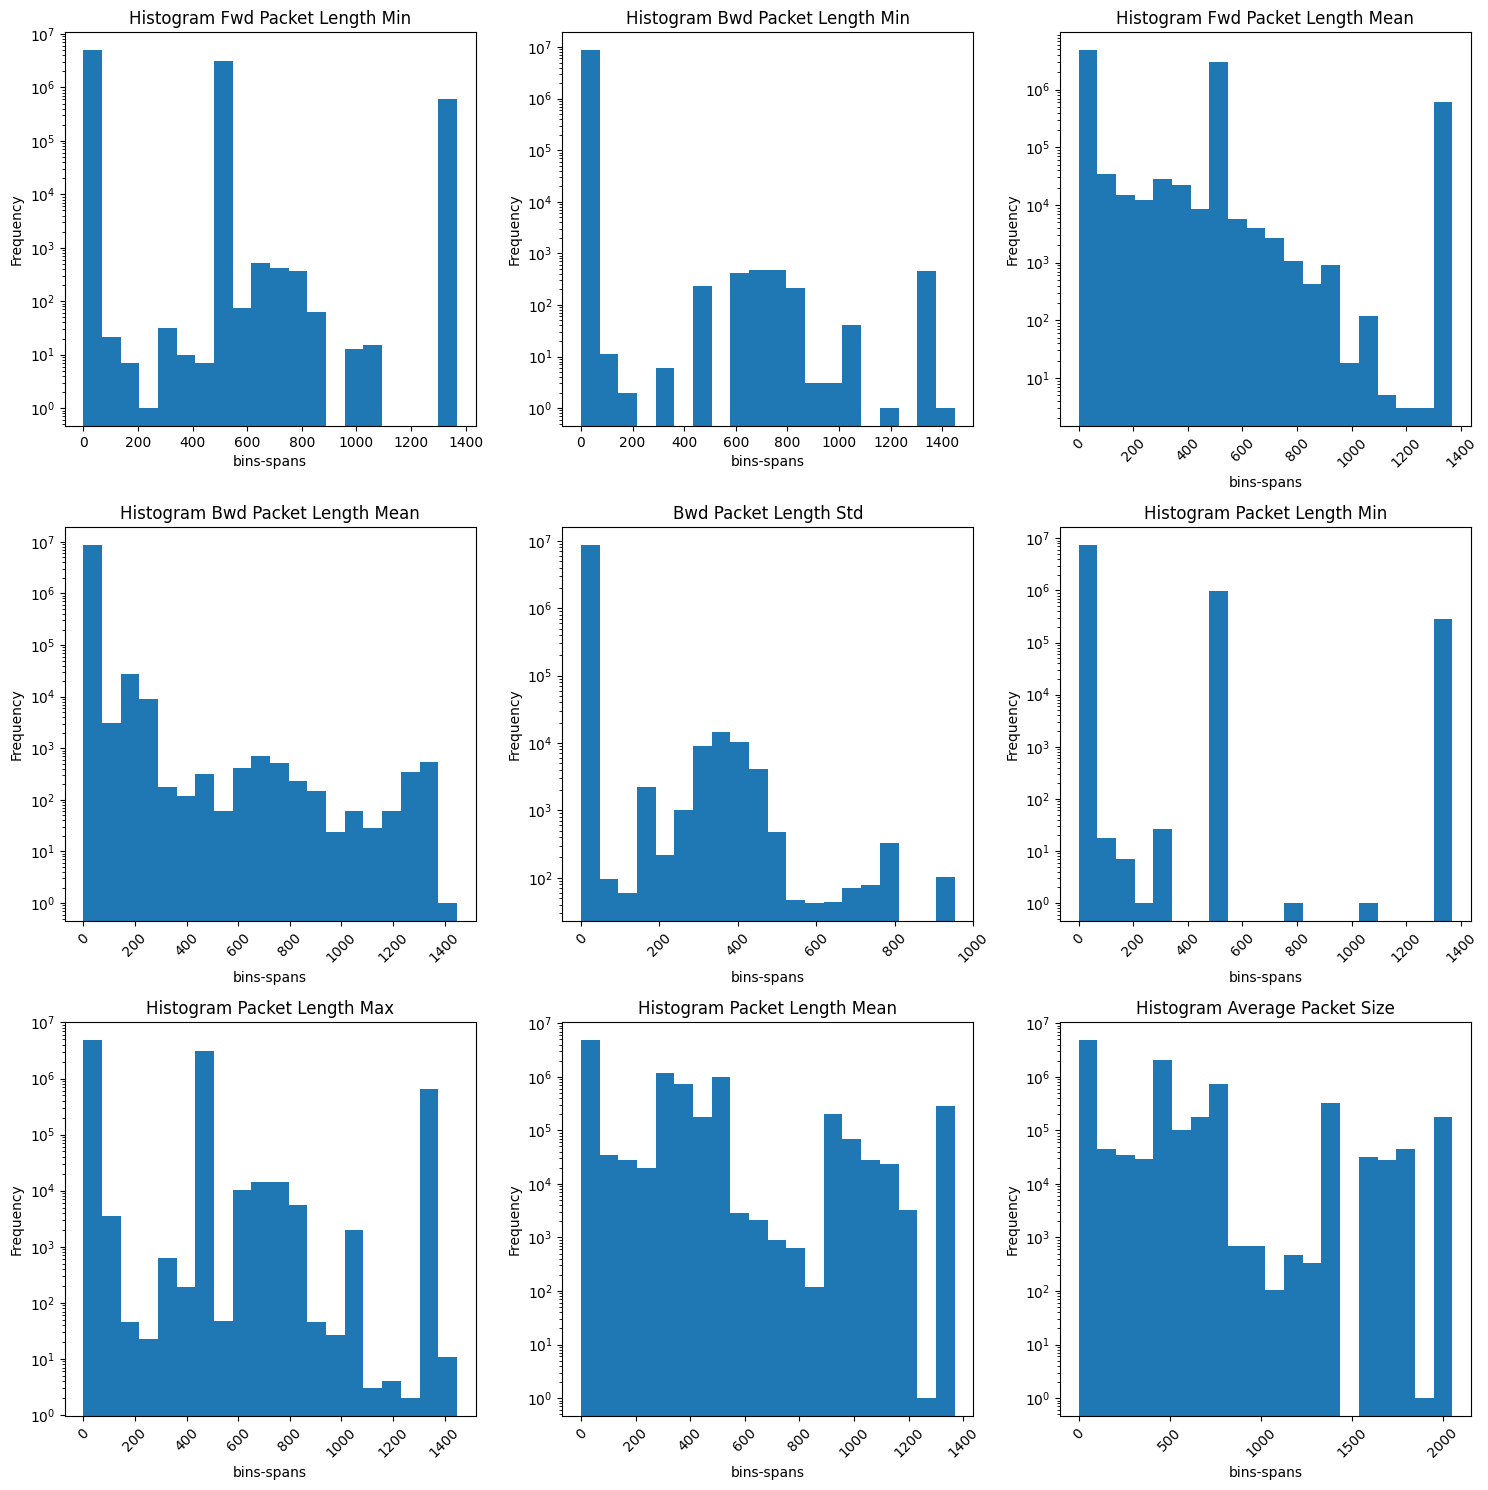

In [19]:
fig, axs = plt.subplots(3, 3 ,figsize=(15, 15))
# List of your selected columns
cols_of_interest = [
    'Total Fwd Packet', 'Total Bwd packets',
    'Total Length of Fwd Packet', 'Total Length of Bwd Packet',
    'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean',
    'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean',
    'Bwd Packet Length Std', 'Average Packet Size', 'Fwd Segment Size Avg',
    'Bwd Segment Size Avg', 'Packet Length Min', 'Packet Length Max',
    'Packet Length Mean', 'Packet Length Std', 'Packet Length Variance'
]
# Filter the dataframe for only these columns
#selected_df = df_data[cols_of_interest]
axs[0, 0].hist(df_data['Fwd Packet Length Min'],bins=20)
axs[0, 0].set_yscale('log')
axs[0, 0].set_title('Histogram Fwd Packet Length Min')
axs[0, 0].set_xlabel('bins-spans')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df_data[ 'Bwd Packet Length Min'],bins=20)
axs[0, 1].set_yscale('log')
axs[0, 1].set_title('Histogram Bwd Packet Length Min')
axs[0, 1].set_xlabel('bins-spans')
axs[0, 1].set_ylabel('Frequency')

axs[0, 2].hist(df_data['Fwd Packet Length Mean'],bins=20)
axs[0, 2].set_yscale('log')
axs[0, 2].set_title('Histogram Fwd Packet Length Mean')
axs[0, 2].set_xlabel('bins-spans')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].tick_params(axis='x', rotation=45) 


axs[1, 0].hist(df_data['Bwd Packet Length Mean'],bins=20)
axs[1, 0].set_yscale('log')
axs[1, 0].set_title('Histogram Bwd Packet Length Mean')
axs[1, 0].set_xlabel('bins-spans')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 1].hist(df_data['Bwd Packet Length Std'],bins=20)
axs[1, 1].set_yscale('log')
axs[1, 1].set_title('Bwd Packet Length Std')
axs[1, 1].set_xlabel('bins-spans')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=45)                


axs[1, 2].hist(df_data['Packet Length Min'],bins=20)
axs[1, 2].set_yscale('log')
axs[1, 2].set_title('Histogram Packet Length Min')
axs[1, 2].set_xlabel('bins-spans')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].tick_params(axis='x', rotation=45) 


axs[2, 0].hist(df_data['Packet Length Max'],bins=20)
axs[2, 0].set_yscale('log')
axs[2, 0].set_title('Histogram Packet Length Max')
axs[2, 0].set_xlabel('bins-spans')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].tick_params(axis='x', rotation=45) 

axs[2, 1].hist(df_data['Packet Length Mean'],bins=20)
axs[2, 1].set_yscale('log')
axs[2, 1].set_title('Histogram Packet Length Mean')
axs[2, 1].set_xlabel('bins-spans')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', rotation=45) 

axs[2, 2].hist(df_data['Average Packet Size'],bins=20)
axs[2, 2].set_yscale('log')
axs[2, 2].set_title('Histogram Average Packet Size')
axs[2, 2].set_xlabel('bins-spans')
axs[2, 2].set_ylabel('Frequency')
axs[2, 2].tick_params(axis='x', rotation=45) 
plt.tight_layout()

# Fields for removal no information gain

In [22]:
#Dropped columns because they do not give insight and because they have constant values
print(df_data['Bwd PSH Flags'].nunique())
print(df_data['Bwd URG Flags'].nunique()) 
print(df_data['Fwd Bytes/Bulk Avg'].nunique())
print(df_data['Fwd Bytes/Bulk Avg'].nunique())
print(df_data['Fwd Packet/Bulk Avg'].nunique())
print(df_data['Fwd Bulk Rate Avg'].nunique())


1
1
1
1
1
1


# X-Axis ticks need formatting -Histograms below still on process
# -Plots are Pending   for IAT  fields 

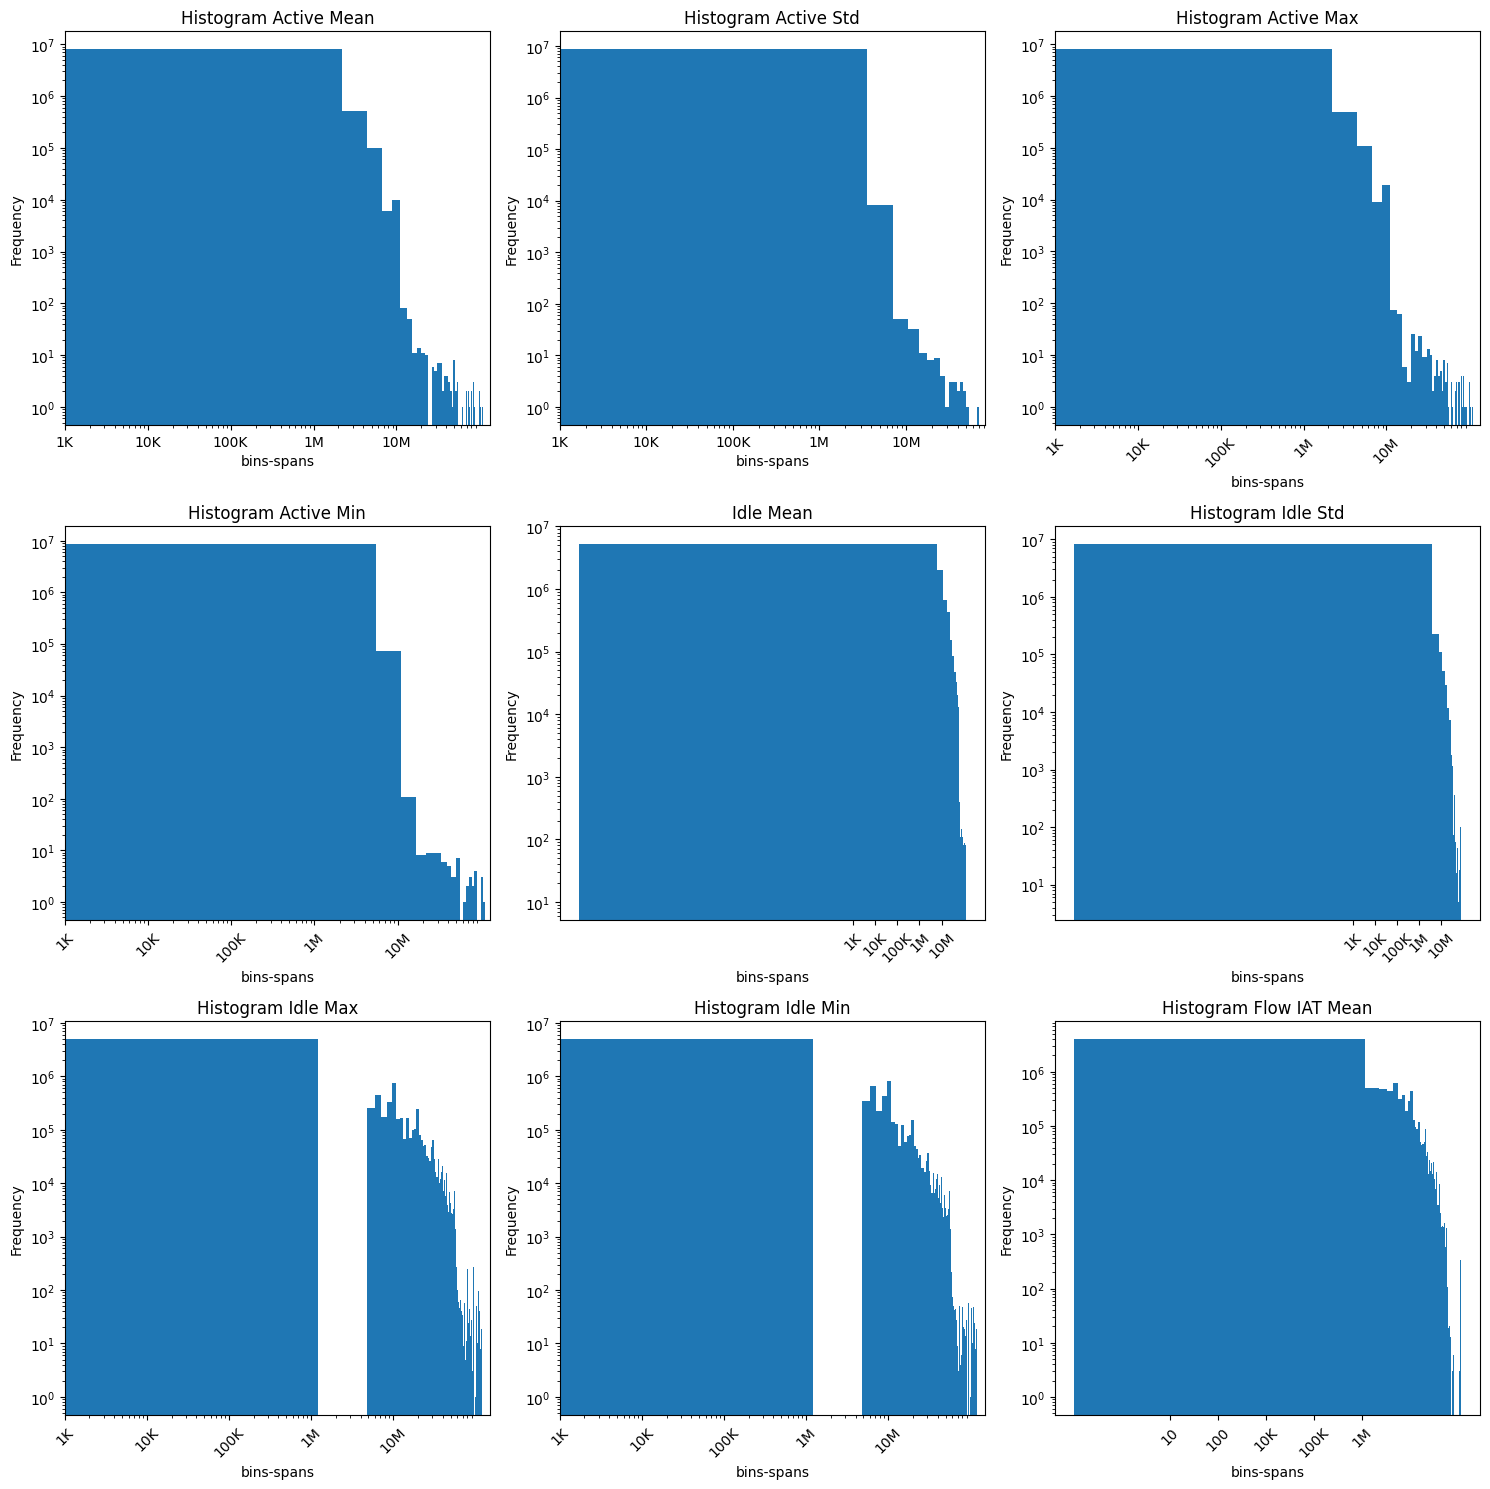

In [21]:
cols_of_interest = ['Active Mean','Active Std','Active Max','Active Min',
                    'Idle Mean','Idle Std','Idle Max','Idle Min','Flow IAT Mean' ,'Flow IAT Std','Flow IAT Max','Flow IAT Min']
              
        

fig, axs = plt.subplots(3, 3 ,figsize=(15, 15))

# Filter the dataframe for only these columns
#selected_df = df_data[cols_of_interest]
axs[0, 0].hist(df_data['Active Mean'],bins=50)
axs[0, 0].set_yscale('log')
axs[0, 0].set_xscale('log')
axs[0, 0].set_title('Histogram Active Mean')
axs[0, 0].set_xlabel('bins-spans')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[0, 1].hist(df_data['Active Std'],bins=20)
axs[0, 1].set_yscale('log')
axs[0, 1].set_xscale('log')
axs[0, 1].set_title('Histogram Active Std')
axs[0, 1].set_xlabel('bins-spans')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[0, 2].hist(df_data['Active Max'],bins=50)
axs[0, 2].set_yscale('log')
axs[0, 2].set_xscale('log')
axs[0, 2].set_title('Histogram Active Max')
axs[0, 2].set_xlabel('bins-spans')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].tick_params(axis='x', rotation=45) 

axs[0, 2].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[1, 0].hist(df_data['Active Min'],bins=20)
axs[1, 0].set_yscale('log')
axs[1, 0].set_xscale('log')
axs[1, 0].set_title('Histogram Active Min')
axs[1, 0].set_xlabel('bins-spans')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].tick_params(axis='x', rotation=45)

axs[1, 0].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[1, 1].hist(df_data['Idle Mean'],bins=20)
axs[1, 1].set_yscale('log')
axs[1, 1].set_xscale('log')
axs[1, 1].set_title('Idle Mean')
axs[1, 1].set_xlabel('bins-spans')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].tick_params(axis='x', rotation=45)                

axs[1, 1].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[1, 2].hist(df_data['Idle Std'],bins=20)
axs[1, 2].set_yscale('log')
axs[1, 2].set_xscale('log')
axs[1, 2].set_title('Histogram Idle Std')
axs[1, 2].set_xlabel('bins-spans')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].tick_params(axis='x', rotation=45) 

axs[1, 2].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[2, 0].hist(df_data['Idle Max'],bins=100)
axs[2, 0].set_yscale('log')
axs[2, 0].set_xscale('log')
axs[2, 0].set_title('Histogram Idle Max')
axs[2, 0].set_xlabel('bins-spans')
axs[2, 0].set_ylabel('Frequency')
axs[2, 0].tick_params(axis='x', rotation=45) 

axs[2, 0].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[2, 1].hist(df_data['Idle Min'],bins=100)
axs[2, 1].set_yscale('log')
axs[2, 1].set_xscale('log')
axs[2, 1].set_title('Histogram Idle Min')
axs[2, 1].set_xlabel('bins-spans')
axs[2, 1].set_ylabel('Frequency')
axs[2, 1].tick_params(axis='x', rotation=45) 
axs[2, 1].set_xticks([1e3, 1e4, 1e5, 1e6, 1e7,], labels=['1K', '10K', '100K', '1M','10M'])

axs[2, 2].hist(df_data['Flow IAT Mean'],bins=100)
axs[2, 2].set_yscale('log')
axs[2, 2].set_xscale('log')
axs[2, 2].set_title('Histogram Flow IAT Mean')
axs[2, 2].set_xlabel('bins-spans')
axs[2, 2].set_ylabel('Frequency')
axs[2, 2].tick_params(axis='x', rotation=45) 

axs[2, 2].set_xticks([1e2, 1e3, 1e4, 1e5, 1e6,], labels=['10','100','10K', '100K', '1M']) #'10M'
plt.tight_layout()

In [ ]:
#test